## Observations and Insights 

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results= "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [65]:
# Checking the number of mice.
total_mice= (merge_data["Mouse ID"].count())
total_mice_df= pd.DataFrame([total_mice], columns = ["Mouse ID"])
total_mice_df

,Mouse ID
0,1893


In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_timepoint= merge_data.loc[merge_data.duplicated(["Mouse ID", "Timepoint"])]
mouse_id_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = merge_data[merge_data.duplicated(['Mouse ID',])]
all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [69]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean=(clean_df["Mouse ID"].count())
mouse_count_clean_df= pd.DataFrame([mouse_count_clean], columns = ["Mouse ID"])
mouse_count_clean_df        

,Mouse ID
0,249


## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = merge_data.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen = merge_data.groupby('Drug Regimen')
agg_drug_regimen_df = agg_drug_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_drug_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

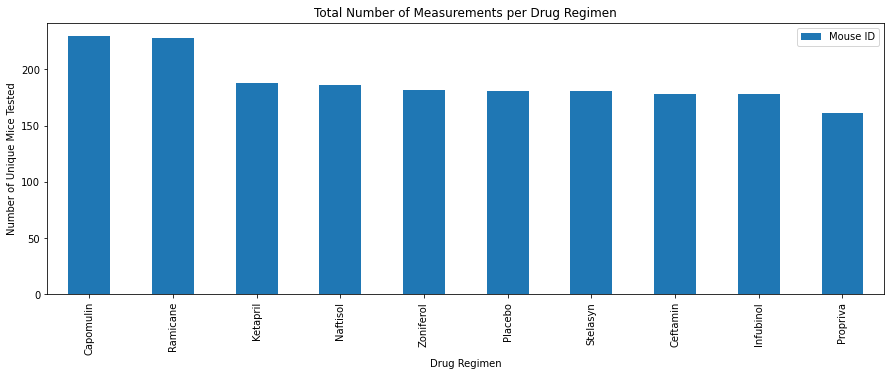

In [75]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
data_drug_regimen = pd.DataFrame(summary_df.count()).reset_index()
drug_bar_pandas = data_drug_regimen[['Drug Regimen', 'Mouse ID']]
drug_bar_pandas = drug_bar_pandas.set_index('Drug Regimen')

drug_bar_pandas = drug_bar_pandas.sort_values('Mouse ID', ascending=False)
drug_bar_pandas.plot(kind='bar', figsize=(15,5))
plt.title("Total Number of Measurements per Drug Regimen")
plt.ylabel('Number of Unique Mice Tested')
plt.show()

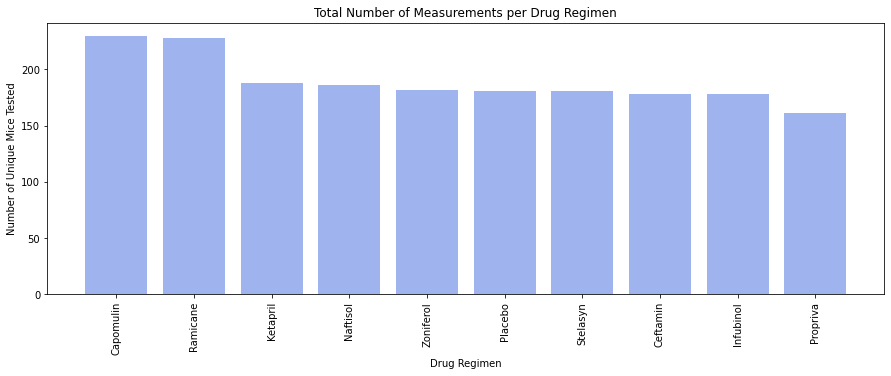

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
test_count = merge_data['Drug Regimen'].value_counts()

x_axis = np.arange(len(test_count))

tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5))
plt.bar(x_axis, test_count, color='royalblue', alpha=0.5, align='center')
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],rotation='vertical')


plt.title('Total Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.show()


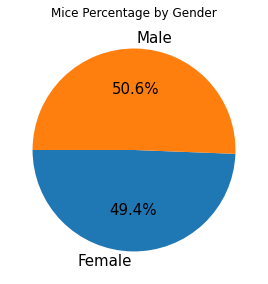

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(merge_data.groupby(['Sex']).count()).reset_index()
gender_data = gender_data[['Sex', 'Mouse ID']]

plt.figure(figsize=(15,5))
ax1 = plt.subplot(121, aspect='equal')
gender_data.plot(kind='pie', y = 'Mouse ID', ax=ax1, autopct='%1.1f%%', startangle=180,
                  labels=gender_data['Sex'], legend=False, fontsize=15)
plt.title("Mice Percentage by Gender")
plt.xlabel('')
plt.ylabel('')
plt.show()


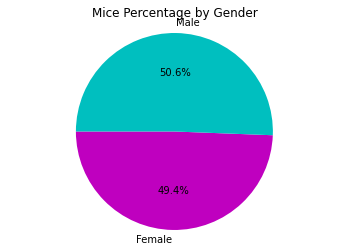

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = merge_data.groupby(['Sex'])['Mouse ID'].count().tolist()
labels = ['Female', 'Male']
colors = ['m', 'c']
plt.pie(gender_count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Mice Percentage by Gender')
plt.show()


## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = merge_data.loc[merge_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = merge_data.loc[merge_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = merge_data.loc[merge_data["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]

#Create above variable as a dataframe for volume
Capomulin_volume = pd.DataFrame(Capomulin_last)

# Merge this group with original dataframe 
Capomulin_merge = pd.merge(Capomulin_volume, merge_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [85]:
# Capomulin Quartiles and IQR
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
print(f"The the median of Capomulin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The the median of Capomulin tumors is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [95]:
# Start by getting the last (greatest) timepoint for each mouse
# Second treatment - Ramicane
Ramicane_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]

#Create above variable as a dataframe for volume
Ramicane_volume = pd.DataFrame(Ramicane_last)

# Merge this group with original dataframe 
Ramicane_merge = pd.merge(Ramicane_volume, merge_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [96]:
# Ramicane Quartiles and IQR
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The the median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The the median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [97]:
# Start by getting the last (greatest) timepoint for each mouse
Infubinol_last = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]

#Create above variable as a dataframe for volume
Infubinol_volume = pd.DataFrame(Infubinol_last)

# Merge this group with original dataframe 
Infubinol_merge = pd.merge(Infubinol_volume, merge_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [98]:
# Infubinol Quartiles and IQR
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The the median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The the median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [99]:
# Start by getting the last (greatest) timepoint for each mouse
# Fourth treatment - Ceftamin
Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

#Create above variable as a dataframe for volume
Ceftamin_volume = pd.DataFrame(Ceftamin_last)

# Merge this group with original dataframe 
Ceftamin_merge = pd.merge(Ceftamin_volume, merge_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [100]:
# Ceftamin Quartiles and IQR
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin tumors is: {upperq}")
print(f"The interquartile range of Ceftamin tumors is: {iqr}")
print(f"The the median of Ceftamin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors is: 48.72207785
The upper quartile of Ceftamin tumors is: 64.29983003
The interquartile range of Ceftamin tumors is: 15.577752179999997
The the median of Ceftamin tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


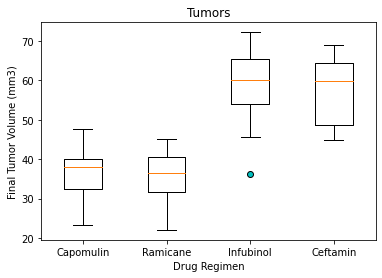

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
blue_circle = dict(markerfacecolor='c')
ax1.set_title("Tumors")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(final_tumor_volume, labels = drug_regimen, flierprops = blue_circle)

plt.show()

## Line and Scatter Plots

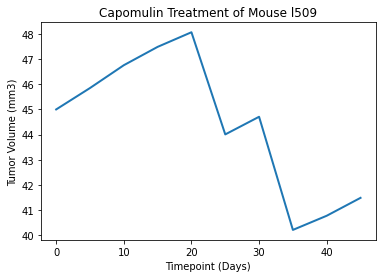

In [110]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]

x_axis_l509 = mouse_l509['Timepoint']
tumor_vol_l509 = mouse_l509['Tumor Volume (mm3)']

plt.title('Capomulin Treatment of Mouse l509')
plt.plot(x_axis_l509, tumor_vol_l509, linewidth=2, markersize=10)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.show()

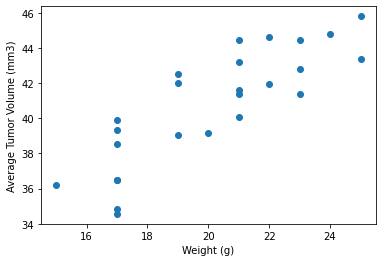

In [111]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

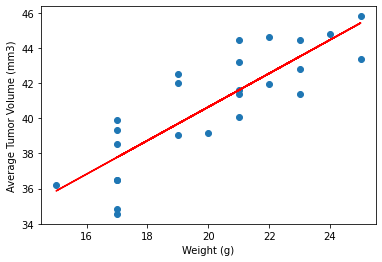

In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_corr_coef = round(st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

regress_values = avg_tumor_vol['Weight (g)'] * slope + intercept
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'], regress_values, color='red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()


In [114]:
capomulin_corr_coef

0.84